# PyMC3

**Author:** Liam Nestelroad  
**Date:** February 18, 2021

In [9]:
import theano.tensor as tt
import math
import scipy
import pandas as pd
import arviz as az
import warnings
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC3 v3.11.1
Running on ArviZ v0.11.1


## IGNORE: notes on what to present

1. Summary of what PyMC3 is
    + History
    + Underlying technologies
    + Features
    
2. Some basic examples
    + Generate fake data and do some neat inference on it
    + Demonstrate niffty syntax
    
3. Visualization
    + MatPlotLib/MPL_toolkit_3D
    + Seaborn
    + ArviZ

3. Under the hood stuff
    + MCMC
    + VI/ADVI
    + JAX
    + Aesara/Theano
4. GPU computing

5. Pros and Cons

6. A review on other python PPL's
    + Pyro
        - Variational Inference based
    + Edward
        - TensorFlow rather than Theano
    + PySTAN
        - Well.... STAN based
        
7. Reasources


## Summary
PyMC3 is a probabilistic programming package for Python that allows users to fit Bayesian models using a variety of numerical methods, most notably Markov chain Monte Carlo (MCMC) and variational inference (VI). Its flexibility and extensibility make it applicable to a large suite of problems. Along with core model specification and fitting functionality, PyMC3 includes functionality for summarizing output and for model diagnostics.

Features include:
+ Modern methods for fitting Bayesian models, including MCMC and VI.
+ Includes a large suite of well-documented statistical distributions.
+ Uses Theano as the computational backend, allowing for fast expression evaluation, automatic gradient calculation, and GPU computing.
+ Built-in support for Gaussian process modeling.
+ Model summarization and plotting.
+ Model checking and convergence detection.
+ Extensible: easily incorporates custom step methods and unusual probability distributions.
+ Bayesian models can be embedded in larger programs, and results can be analyzed with the full power of Python.


## Probability Distributions

Finished [100%]: Average Loss = 0.0085547
/opt/conda/lib/python3.8/site-packages/arviz/utils.py:409: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_cov" failed type inference due to: Untyped global name '_dot': Cannot determine Numba type of <class 'arviz.utils.maybe_numba_fn'>

File "../../../opt/conda/lib/python3.8/site-packages/arviz/utils.py", line 421:
def _cov(data):
    <source elided>
        x -= avg[:, None]
        prod = _dot(x, x.T.conj())
        ^

  @conditional_jit(cache=True)
/opt/conda/lib/python3.8/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "_cov" was compiled in object mode without forceobj=True.

File "../../../opt/conda/lib/python3.8/site-packages/arviz/utils.py", line 410:
@conditional_jit(cache=True)
def _cov(data):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/opt/conda/lib/python3.8/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back 

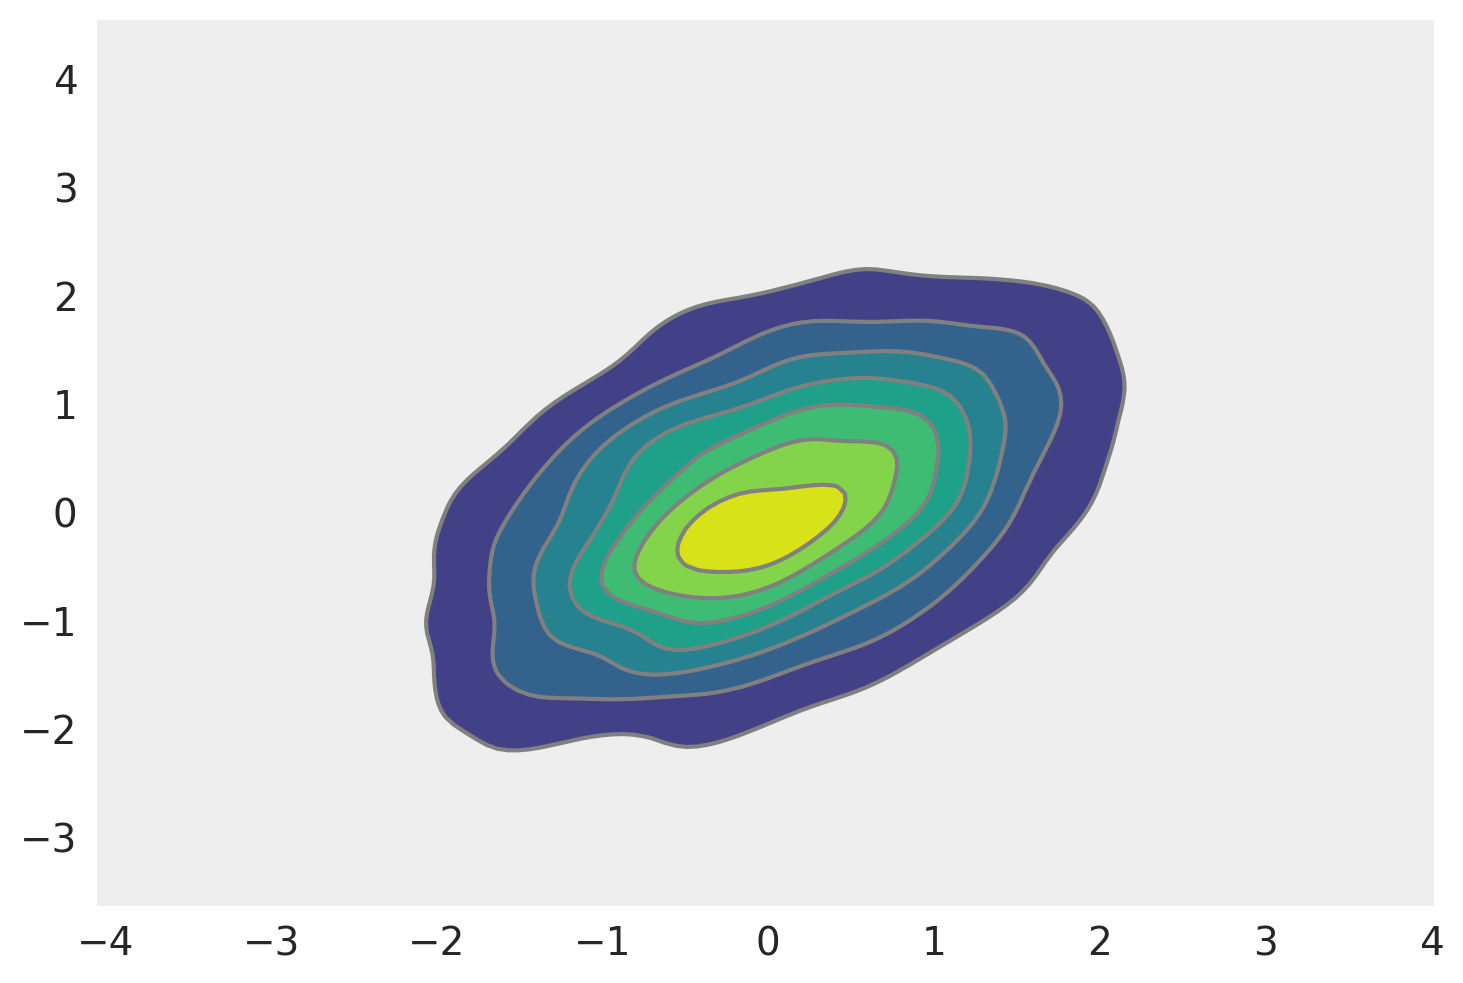

In [52]:
mu = pm.floatX([0.0, 0.0])
cov = pm.floatX([[1, 0.5], [0.5, 1.0]])
with pm.Model() as model:
    pm.MvNormal("x", mu=mu, cov=cov, shape=2)
    approx = pm.FullRankADVI().fit()

plt.figure()
trace = approx.sample(10000)
az.plot_kde(trace["x"][:, 0], trace["x"][:, 1])

## Bayesian Inference

## Visualization

## Under the Hood: Markov Chain Monty Carlo

## Aesara and JAX

Theano is a tensor library developed by Montreal Institute for Learning Algorithms (MILA) that was discontinued in 2017 due to the rise in popularity with Google's TensorFlow and other projects. This left the devs at PyMC in a bit of a pickle since their back-end relied on Theano for quick computations. While an effort was made to switch over to TensorFlow under a new PyMC version (PyMC4), the attempt was scrapped. TensorFlow is a dynamic graph framework which is great for evolving neural nets, but adds too much overhead for PyMC's needs whereas Theano was a static graph library and thus much faster. The decision was made for the pymc community to fork Theano under the name Aesara and maintain it themselves. [The official announcement](https://pymc-devs.medium.com/the-future-of-pymc3-or-theano-is-dead-long-live-theano-d8005f8a0e9b) can be found here.

---
### Speeding up Sampling


## Pros and Cons

## Conclusion

## Resources

+ [PyMC3 github](https://github.com/pymc-devs/pymc3)
+ [Probabilistic Programming and Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)
+ [The Future of PyMC3, or: Theano is Dead, Long Live Theano](https://pymc-devs.medium.com/the-future-of-pymc3-or-theano-is-dead-long-live-theano-d8005f8a0e9b)
+ [Thomas Wiecki's Blog](https://twiecki.io/)
+ [JAX github](https://github.com/google/jax)
+ [ArviZ: A Bayesian Visualization Library](https://arviz-devs.github.io/arviz/)